# Question 1

In [1]:
# 初始化
import numpy as np
np.random.seed(2021) # set a constant seed to get same random matrixs
A = np.random.rand(500, 100)
x_ = np.zeros([100, 1])
x_[:5, 0] += np.array([i+1 for i in range(5)]) # x_ denotes expected x
b = np.matmul(A, x_) + np.random.randn(500, 1) * 0.1 # add a noise to b
lam = 10 # try some different values in {0.1, 1, 10}

In [2]:
#调包
import matplotlib.pyplot as plt

In [3]:
#定义一系列辅助函数
def f(A,x,b,lam):
    """定义f函数,其实是LASSO函数"""
    f=1/2*np.linalg.norm(np.dot(A,x)-b,ord=2)**2+lam*np.linalg.norm(x,ord=1)
    return f

##  Proximal Gradient Descent.

### 函数编写

In [4]:
def sign(x):
    """定义 sign function"""
    sign=np.zeros(x_.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if x[i][j]>0:
                sign[i][j]=1
            elif x[i][j]==0:
                sign[i][j]=0
            else:
                sign[i][j]=-1
    return sign

def g(A,x,b,lam):
    """定义g函数"""
    gtemp=np.dot(A.T,np.dot(A,x)-b)+lam*sign(x)
    return gtemp

In [5]:
def max_single(A):
    """return max single value of A^T*A"""
    return max(np.linalg.eig(np.dot(A.T,A))[0])
def z(A,x,b):
    """定义z函数，返回$z^{t}$"""
    single_val=max_single(A)
    z=np.dot(np.eye(len(x))-np.dot(A.T,A)/single_val,x)+np.dot(A.T,b)/single_val
    return z
def shrink_z(z,lam,A):
    """对z完成一个收缩的过程,返回x^{t+1}"""
    #temp即为我需要的x^{t+1}
    temp=abs(z)-lam/max_single(A)
    for i in range(0,len(temp)):
        if temp[i]>=0:
            temp[i]=temp[i]
        else:
            temp[i]=0
    return temp

In [6]:
# 定义临近点梯度下降法
def prox(A,x,b,lam,T):
    """
    这是临近点梯度下降法的实现，返回最终的xT
    其中T是最大迭代轮次
    """
    k=0
    x_list=[x]
    while k<T:
        k=k+1
        z_ans=z(A,x,b)
        x=sign(z_ans)*shrink_z(z_ans,lam,A)
        x_list.append(x)
    return (x,x_list)

### 调用函数，解决问题

In [7]:
%%time
m,n=A.shape
x0=np.ones([n,1])
lam=0.1
T=3000
x,prox_list_lam01=prox(A,x0,b,lam,T)
print("这是prox算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是prox算法的结果
选择lambda: 0.1
选择T: 3000
初始函数值为： 455335.33180182136
现在的函数值为： 3.615807408827206
现在的x前五个是： [[1.02765588]
 [1.9712927 ]
 [2.99865798]
 [3.95806657]
 [4.99160638]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.1680462127201749
Wall time: 59.4 s


In [8]:
%%time
m,n=A.shape
x0=np.ones([n,1])
lam=1
T=3000
x,prox_list_lam1=prox(A,x0,b,lam,T)
print("这是prox算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是prox算法的结果
选择lambda: 1
选择T: 3000
初始函数值为： 455425.33180182136
现在的函数值为： 17.38378047441386
现在的x前五个是： [[1.0046099 ]
 [1.96102766]
 [2.98675508]
 [3.95472447]
 [4.98270444]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.07847464375891093
Wall time: 59.4 s


In [9]:
%%time
m,n=A.shape
x0=np.ones([n,1])
lam=10
T=3000
x,prox_list_lam10=prox(A,x0,b,lam,T)
print("这是prox算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是prox算法的结果
选择lambda: 10
选择T: 3000
初始函数值为： 456325.33180182136
现在的函数值为： 151.9323169654445
现在的x前五个是： [[0.99135544]
 [1.96272318]
 [2.97462403]
 [3.95217799]
 [4.97877927]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.07399364300891707
Wall time: 57.4 s


## BCD下降方法
### 函数编写

In [10]:
def BCD(A,x0,b,lam,T):
    """
    这是BCD下降法的实现，返回最终的xT,以及过程中产生的x_list
    其中T是最大迭代轮次
    """    
    m,n=A.shape
    x_list=[x0]
    for t in range(0,T):
        for k in range(0,n):
            #计算 Σa_ix_i^t
            sum_ai_xi=np.dot(A,x).reshape(m,)-A[:,k]*x[k]
            temp=np.dot(A[:,k],b)-np.dot(A[:,k],sum_ai_xi)
            temp1=np.sign(temp)
            temp2=np.abs(temp)-lam
            if temp2<=0:
                temp2=0
            x[k]=temp1*temp2/np.dot(A[:,k],A[:,k])
        x_list.append(x)
    return (x,x_list)
                          

### 调用函数，解决问题

In [11]:
%%time
m,n=A.shape
x0=np.ones([n,1])

lam=0.1
T=3000
x,bcd_list_lam01=BCD(A,x0,b,lam,T)
print("这是BCD算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
x0=np.ones([n,1])
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是BCD算法的结果
选择lambda: 0.1
选择T: 3000
初始函数值为： 455335.33180182136
现在的函数值为： 3.590069805114487
现在的x前五个是： [[1.02690741]
 [1.97538962]
 [3.00890966]
 [3.96906792]
 [5.00877942]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.15253831412476415
Wall time: 22.6 s


In [12]:
%%time
m,n=A.shape
x0=np.ones([n,1])

lam=1
T=3000
x,bcd_list_lam1=BCD(A,x0,b,lam,T)
print("这是BCD算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
x0=np.ones([n,1])
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是BCD算法的结果
选择lambda: 1
选择T: 3000
初始函数值为： 455425.33180182136
现在的函数值为： 17.38345606315959
现在的x前五个是： [[1.00528902]
 [1.96140737]
 [2.98836366]
 [3.95517755]
 [4.98537468]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.07742851590169146
Wall time: 22.7 s


In [13]:
%%time
m,n=A.shape
x0=np.ones([n,1])

lam=10
T=3000
x,bcd_list_lam10=BCD(A,x0,b,lam,T)
print("这是BCD算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
x0=np.ones([n,1])
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

这是BCD算法的结果
选择lambda: 10
选择T: 3000
初始函数值为： 456325.33180182136
现在的函数值为： 151.93227105788
现在的x前五个是： [[0.99157862]
 [1.96261371]
 [2.97499677]
 [3.95205914]
 [4.97976442]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.07370668711303598
Wall time: 23 s


## ADMM下降法
### 函数编写

In [14]:
def ADMM(A,b,x0,z0,v0,lam,ρ=0.1,T=100,ϵ=1e-3):
    """定义ADMM下降法，输入
    A,b,x0,T,ϵ显然
    z0即为正规项中的变量z0
    v0是初始拉格朗日乘子
    ρ是设定的步长
    返回(X_list,z_list,u_list)"""
    A=np.array(A)
    b=np.array(b)
    x=np.array(x0)
    z=np.array(z0)
    v=np.array(v0)
    u=v/ρ
    x_list=[np.array(x0)]#x迭代的序列
    z_list=[np.array(z0)]#z迭代的序列
    u_list=[np.array(u)]#u迭代的序列
    condition=0
    ATA=np.dot(A.T,A)
    c=0
    t=0
    while condition==0:
        x=np.dot(np.linalg.inv(ATA+ρ*np.eye(ATA.shape[0])),np.dot(A.T,b)+ρ*z-ρ*u)
        x_list.append(x)
        temp=abs(c-x-u)-lam/ρ
        temp[temp<=0]=0
        z=np.sign(x+u)*temp
        z_list.append(z)
        u=u+x-z
        u_list.append(u)
        t=t+1
        if t>T:
            print("因为达到最大步长结束")
            condition=1
        elif np.linalg.norm(ρ*(z-z_list[-2]))<=ϵ and  np.linalg.norm(x-z)<=ϵ:
            print("因为接近KKT条件结束")
            condition=1
        else:
            continue
    return (x,z,u,x_list,z_list,u_list)

### 调用函数，解决问题

In [15]:
%%time
m,n=A.shape
x0=np.ones([n,1])
z0=np.ones([n,1])
v0=np.ones([n,1])
ρ=0.01
ϵ=1e-4
lam=0.1
T=3000
x,z,u,admm_listx_lam01,admm_listz_lam01,admm_listv_lam01=ADMM(A,b,x0,z0,v0,lam,ρ=ρ,T=T,ϵ=ϵ)
print("这是ADMM算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

因为达到最大步长结束
这是ADMM算法的结果
选择lambda: 0.1
选择T: 3000
初始函数值为： 455335.33180182136
现在的函数值为： 3.5929177319956427
现在的x前五个是： [[1.02676591]
 [1.97581049]
 [3.00967016]
 [3.96981269]
 [5.00857886]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.1530867794184869
Wall time: 1.66 s


In [16]:
%%time
m,n=A.shape
x0=np.ones([n,1])
z0=np.ones([n,1])
v0=np.ones([n,1])
ρ=0.01
ϵ=1e-4
lam=1
T=3000
x,z,u,admm_listx_lam1,admm_listz_lam1,admm_listv_lam1=ADMM(A,b,x0,z0,v0,lam,ρ=ρ,T=T,ϵ=ϵ)
print("这是ADMM算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

因为达到最大步长结束
这是ADMM算法的结果
选择lambda: 1
选择T: 3000
初始函数值为： 455425.33180182136
现在的函数值为： 17.852674917456238
现在的x前五个是： [[1.0194559 ]
 [1.97470668]
 [3.00418318]
 [3.96877229]
 [5.00346139]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.1172854877884052
Wall time: 1.65 s


In [17]:
%%time
m,n=A.shape
x0=np.ones([n,1])
z0=np.ones([n,1])
v0=np.ones([n,1])
ρ=0.01
ϵ=1e-4
lam=10
T=3000
x,z,u,admm_listx_lam10,admm_listz_lam10,admm_listv_lam10=ADMM(A,b,x0,z0,v0,lam,ρ=ρ,T=T,ϵ=ϵ)
print("这是ADMM算法的结果")
print("选择lambda:",lam)
print("选择T:",T)
print("初始函数值为：",f(A,x0,b,lam))
print("现在的函数值为：",f(A,x,b,lam))
print("现在的x前五个是：",x[:5])
print("现在的x和最终结果之间的差距是（用二范数度量）:",np.linalg.norm(x-x_))

因为达到最大步长结束
这是ADMM算法的结果
选择lambda: 10
选择T: 3000
初始函数值为： 456325.33180182136
现在的函数值为： 158.3098481991394
现在的x前五个是： [[0.79793127]
 [1.75723034]
 [2.78009305]
 [3.78056778]
 [4.76365744]]
现在的x和最终结果之间的差距是（用二范数度量）: 0.5246763472396258
Wall time: 1.7 s


**画一张丑陋的图片，看看$x$,$z$是怎么随着迭代变化的，以$\lambda=0.1$为例**

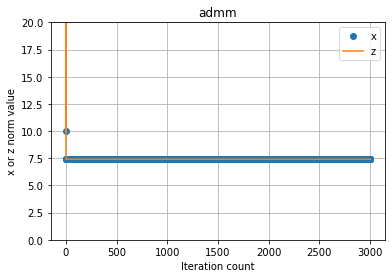

In [18]:
plt.ylim(0,20)
norm_x=np.linalg.norm(admm_listx_lam01,axis=1)
norm_z=np.linalg.norm(admm_listz_lam01,axis=1)
buchang=np.arange(0,len(norm_x))
plt.title("admm")
plt.grid()
plt.xlabel("Iteration count")
plt.ylabel("x or z norm value")
plt.plot(buchang,norm_x,"o",label="x")
plt.plot(buchang,norm_z,"-",label="z")
plt.legend()
plt.show()

### 下降法是否收敛之比较
* 看看对于LASSO问题，各种下降法是否下降，以及下降的速度怎么样，这里是按照函数值为因变量进行的比较

In [19]:
import matplotlib.pyplot as plt

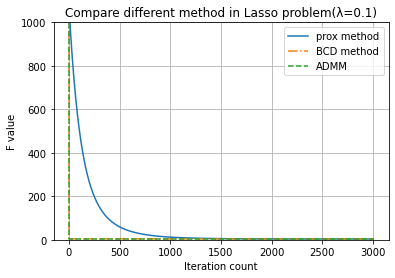

In [20]:
# lambda=0.1 的时候
prox_f=[]
bcd_f=[]
admm_f=[]
for i in prox_list_lam01:
    prox_f.append(f(A,i,b,lam=0.1))
for i in bcd_list_lam01:
    bcd_f.append(f(A,i,b,lam=0.1))
for i in admm_listx_lam01:
    admm_f.append(f(A,i,b,lam=0.1))
max_len=max(len(prox_f),len(bcd_f),len(admm_f))
prox_f=np.array(prox_f)
bcd_f=np.array(bcd_f)
admm_f=np.array(admm_f)
while max_len>len(prox_f):
    prox_f=np.append(prox_f,np.nan)
while max_len>len(bcd_f):
    bcd_f=np.append(bcd_f,np.nan)
while max_len>len(admm_f):
    admm_f=np.append(admm_f,np.nan)
buchang=np.arange(0,max_len,1)
plt.title("Compare different method in Lasso problem(λ=0.1)")
plt.ylim(0,1000)
plt.ylabel("F value")
plt.xlabel("Iteration count")
plt.grid()
plt.plot(buchang,prox_f,"-",label="prox method")
plt.plot(buchang,bcd_f,"-.",label="BCD method")
plt.plot(buchang,admm_f,"--",label="ADMM")
plt.legend()
plt.show()

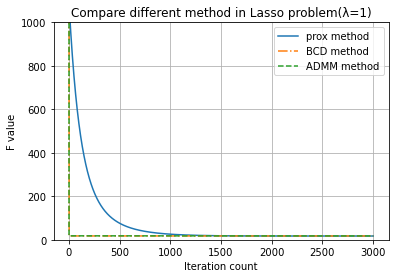

In [21]:
# lambda=1 的时候
prox_f=[]
bcd_f=[]
admm_f=[]
for i in prox_list_lam1:
    prox_f.append(f(A,i,b,lam=1))
for i in bcd_list_lam1:
    bcd_f.append(f(A,i,b,lam=1))
for i in admm_listx_lam1:
    admm_f.append(f(A,i,b,lam=1))
max_len=max(len(prox_f),len(bcd_f),len(admm_f))
prox_f=np.array(prox_f)
bcd_f=np.array(bcd_f)
admm_f=np.array(admm_f)
while max_len>len(prox_f):
    prox_f=np.append(prox_f,np.nan)
while max_len>len(bcd_f):
    bcd_f=np.append(bcd_f,np.nan)
while max_len>len(admm_f):
    admm_f=np.append(admm_f,np.nan)
buchang=np.arange(0,max_len,1)
plt.title("Compare different method in Lasso problem(λ=1)")
plt.ylim(0,1000)
plt.ylabel("F value")
plt.xlabel("Iteration count")
plt.grid()
plt.plot(buchang,prox_f,"-",label="prox method")
plt.plot(buchang,bcd_f,"-.",label="BCD method")
plt.plot(buchang,admm_f,"--",label="ADMM method")
plt.legend()
plt.show()

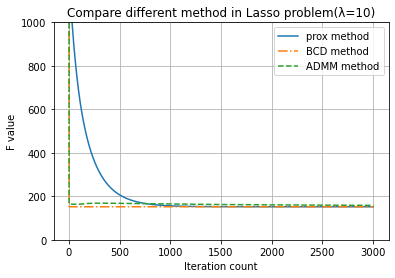

In [22]:
# lambda=10 的时候
prox_f=[]
bcd_f=[]
admm_f=[]
for i in prox_list_lam10:
    prox_f.append(f(A,i,b,lam=10))
for i in bcd_list_lam10:
    bcd_f.append(f(A,i,b,lam=10))
for i in admm_listx_lam10:
    admm_f.append(f(A,i,b,lam=10))
max_len=max(len(prox_f),len(bcd_f),len(admm_f))
prox_f=np.array(prox_f)
bcd_f=np.array(bcd_f)
admm_f=np.array(admm_f)
while max_len>len(prox_f):
    prox_f=np.append(prox_f,np.nan)
while max_len>len(bcd_f):
    bcd_f=np.append(bcd_f,np.nan)
while max_len>len(admm_f):
    admm_f=np.append(admm_f,np.nan)
buchang=np.arange(0,max_len,1)
plt.title("Compare different method in Lasso problem(λ=10)")
plt.ylim(0,1000)
plt.ylabel("F value")
plt.xlabel("Iteration count")
plt.grid()
plt.plot(buchang,prox_f,"-",label="prox method")
plt.plot(buchang,bcd_f,"-.",label="BCD method")
plt.plot(buchang,admm_f,"--",label="ADMM method")
plt.legend()
plt.show()

# Question2
* 提前定义一些可能会用到的辅助函数
* 辅助函数中参数的传递可能有一些比较奇怪的参数，这些奇怪的参数大多是没有用处的，比如is_regulation是问是否按照正则化进行操作，其实都是按照正则化的logistics函数来操作的，但是为了函数接口的统一，都保留了这个几乎没用的参数

In [23]:
# 载入必须的包包
import numpy as np
import pandas as pd
import sklearn.datasets 
import math
import random

In [24]:
#读取数据，用sklearn即可
A,b=sklearn.datasets.load_svmlight_file("a9a.t")
A=A.toarray()
A.shape

(16281, 122)

In [25]:
def F(A,x,b,is_regulation=1):
    """计算F"""
    m,n=A.shape
    f=1/m*np.sum(np.log(1+np.exp(-np.dot(A,x)*b)))
    if is_regulation==1:
        f+=2*(1e-2)*np.linalg.norm(x)
    return f
def Deri_F(A,x,b,is_regulation=1):
    """计算F的梯度,
    is_regula=1默认计算的是增加了正则项的梯度"""
    m,n=A.shape
    Df=0
    for i in range(0,m):
        ai=A[i,:]
        Df+=-np.exp(-np.dot(A[i,:],x)*b[i])/(1+np.exp(-np.dot(A[i,:],x)*b[i]))*b[i]*ai
    if is_regulation==1:
        Df+=2*(1e-2)/m*x
    return Df
def Sample(A,b,i):
    """实现抽样的过程,i是抽样个数
    返回：(A_sam,b_sam)抽好样的元组"""
    A_b=pd.DataFrame(np.append(A,b.reshape(len(b),1),axis=1))
    A_b_sam=A_b.sample(i)
    A_sam=A_b_sam.iloc[:,:-1].to_numpy()
    b_sam=A_b_sam.iloc[:,-1].to_numpy()
    return (A_sam,b_sam)

## SGD for Logistic Regression with fixed learning rate. 
### 函数实现

In [26]:
# 这是随机梯度下降法的函数实现
def SGD(A,b,x,T=100,s=1e-3,is_regulation=1):
    """
    传入参数
    x:array_like m*n
    b:label m
    x:我估计的函数参变量初值 n
    T:我的迭代步数
    s:我的步长，默认选择课本上给出的最佳步长
    is_regulation:是否使用正则化版本，默认使用
    返回最终x的估计值,以及每一步产生的x"""
    A=np.array(A)
    A=np.append(A,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
    m,n=A.shape
    b=np.array(b)
    x=np.array(x)
    x=np.append(x,1)
    x_list=[x]
    s=s#学习率
    for t in range(0,T):#让他固定走那么多步
        A_sam,b_sam=Sample(A,b,1)#抽样，抽取一个样本
        #计算梯度
        DF=Deri_F(A_sam,x,b_sam,is_regulation=is_regulation)#F此时的梯度
        x=x-s*DF
        x_list.append(x)
    return (x,x_list)#返回的是带着常数估计值的

### 调用函数，解决问题

In [27]:
%%time
#按照正则化的方法来做
m,n=A.shape
x=np.ones(n)#初值x
x_copy=np.ones(n+1)
T=20000
s=1e-3
x,x_list=SGD(A,b,x,T=T,is_regulation=1)
print("这是随机梯度下降法的正则化版本")
print("选择下降共"+str(T)+"步")
print("学习率：",s)
print("x：",x)
A_copy=np.array(A)
A_copy=np.append(A_copy,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
f_now=F(A_copy,x,b,is_regulation=1)
f_copy=F(A_copy,x_copy,b,is_regulation=1)
print("最初函数值为:",f_copy)
print("现在函数值为：",f_now)

这是随机梯度下降法的正则化版本
选择下降共20000步
学习率： 0.001
x： [ 0.02614937  0.24566305  0.37740981  0.52746172  0.36054122 -0.25282245
  0.37565148  0.64249491  0.60426459  0.4827966   0.53147931  0.667828
  0.67002808  0.25739779  0.33557467  0.35381614  0.30393134  0.28650524
  0.5794701   0.28461656  0.51080395  0.08940886  0.70378289  0.58688994
  0.53891419  0.58588154  0.57239554  0.61445314  0.70084113  0.63375981
  0.56035215  0.69049567  0.60255069  0.6561      0.04407528  0.08940886
  0.28461656  0.45548677  0.6636377   0.65822758  0.21762469 -0.32723894
  0.52639184  0.52719146  0.60776442  0.66789885  0.61026199  0.4649578
  0.30963676  0.54295814  0.72362963  0.61711152  0.53298688  0.49431076
  0.40409787  0.52978498  0.58424213  0.63901043  0.6196763   0.67124879
  0.65935827  0.17743676  0.69638842 -0.05966795  0.51963549  0.21439153
 -0.40715124  0.48886896  0.61332601  0.61092791  0.23125352 -0.36063943
 -0.11308749 -1.0662115   0.59248458 -1.04135182  0.56762489  0.0704105
  0.42165809 

In [28]:
#计算相应的函数值，储存下来，方便接下来的画图
SGD_F_list=[]
for i in x_list:
    SGD_F_list.append(F(A_copy,i,b,is_regulation=1))

## SGD for Logistic Regression with decreasing learning rate.
### 函数实现

In [29]:
# 这是随机梯度下降法的函数实现
def SGD_decrease(A,b,x,T=100,s=1e-3,is_regulation=1):
    """
    传入参数
    x:array_like m*n
    b:label m
    x:我估计的函数参变量初值 n
    T:我的迭代步数
    s:我的步长，默认选择课本上给出的最佳步长
    is_regulation:是否使用正则化版本，默认使用
    返回最终x的估计值以及过程中产生的x_list"""
    A=np.array(A)
    A=np.append(A,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
    m,n=A.shape
    b=np.array(b)
    x=np.array(x)
    x=np.append(x,1)
    x_list=[x]
    s=s#学习率
    for t in range(0,T):#让他固定走那么多步
        A_sam,b_sam=Sample(A,b,1)#抽样，抽取一个样本
        #计算梯度
        DF=Deri_F(A_sam,x,b_sam,is_regulation=is_regulation)#F此时的梯度
        x=x-s*DF
        x_list.append(x)
        s=s*(t+1)/(t+2)
    return (x,x_list)#返回的是带着常数估计值的

### 调用函数，解决问题

In [30]:
%%time
m,n=A.shape
x=np.ones(n)
x_copy=np.ones(n+1)
T=20000
s=1
x,x_list=SGD_decrease(A,b,x,T=T,s=s,is_regulation=1)
print("这是消失步长的随机梯度下降法正则化版本")
print("初始步长选择:",s)
print("选择下降共"+str(T)+"步")
print("x：",x)
A_copy=np.array(A)
A_copy=np.append(A_copy,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
f_now=F(A_copy,x,b,is_regulation=1)
f_copy=F(A_copy,x_copy,b,is_regulation=1)
print("最初函数值为:",f_copy)
print("现在函数值为：",f_now)


这是消失步长的随机梯度下降法正则化版本
初始步长选择: 1
选择下降共20000步
x： [ 0.52685507  0.40800736  0.12816756  0.16808358  0.77120136 -0.35506116
  0.73646175  0.86958094  0.04422401  0.75171038  0.79401182  0.81034743
  0.81049003 -0.51163727  0.76097794  0.66617769  0.55454335  0.53225322
  0.98719399  0.46432127  0.75647875  0.24592697  0.83465581  0.79523282
  0.79134912  0.7917671   0.73536989  0.63700615  0.10622757  0.79945192
  0.81272471  0.83898896  0.51688906  0.805632    0.18092794  0.24592697
  0.46432127  0.77595456  0.33518419  0.55815966  0.70584072 -0.27817352
  0.27596172  0.75133106  0.80084269  0.80960735  0.74737531  0.87282261
  0.27158782  0.71256109  0.11953455  0.81233536  0.78175423  0.74874654
  0.68297368  0.71316407  0.73092416  0.52426098  0.79648757  0.81113884
  0.55815651  0.5701896   0.85544961 -0.12322154  0.73077671  0.22159142
 -0.54574009  0.77421203  0.38128943  0.75681823  0.63573533 -0.18117304
 -0.24839417 -1.25570894  0.82614174 -1.20881787  0.77925067  0.5140177
  0.682

In [31]:
##储存过程中每一步的函数值，方便之后画图
SGDd_F_list=[]
for i in x_list:
    SGDd_F_list.append(F(A_copy,i,b,is_regulation=1))

## SVRG for Logistic Regression.
* 学习率和前面SGD一致
### 函数实现

In [32]:
# 这是SVRG下降法的函数定义
def SVRG(A,b,x,s_max=10,T=100,η=1e-3,is_regulation=1):
    """
    传入参数
    x:array_like m*n
    b:label m
    x:我估计的函数参变量初值 n
    s_max:外层迭代轮次
    T:内层每轮迭代步数
    η:我的学习率
    返回最终x的估计值,以及过程中产生的x_list
    """
    A=np.array(A)
    A=np.append(A,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
    m,n=A.shape
    b=np.array(b)
    x=np.array(x)
    x=np.append(x,1)
    η=η#初始化学习率
    x_s=x#初始化x_s
    x_list=[x]
    for s in range(0,s_max):
        x_t=[] #使用list形式x_t来保存每次迭代中的x_t信息，为随机选择x_t设定为x_s提供方便
        z=1/m*Deri_F(A=A,x=x_s,b=b,is_regulation=is_regulation)#计算此时的综合效果
        x=x_s#即将进入内循环，初始化x
        x_t.append(x)#x_t第一个
        for t in range(0,T):
            A_sam,b_sam=Sample(A,b,1)#抽样，抽取一个样本
            #计算现在xt的梯度
            DF=Deri_F(A_sam,x=x,b=b_sam,is_regulation=is_regulation)#L此时的梯度
            #计算之前xs的梯度
            DF_tem=Deri_F(A=A_sam,x=x_s,b=b_sam,is_regulation=is_regulation)
            #梯度下降并将其放入x_t list中
            x=x-η*(DF-DF_tem+z)
            x_t.append(x)
            x_list.append(x)
        i=random.randint(0,len(x_t)-1)
        x_s=x_t[i]
    return (x_t[-1],x_list)    

### 调用函数，解决问题

In [33]:
%%time
m,n=A.shape
x=np.ones(n)
x_copy=np.ones(n+1)
T=500
s_max=40
η=1e-3
x,x_list=SVRG(A,b,x,s_max=s_max,η=1e-3,T=T)
print("这是SVRG下降法的正则化版本")
print("选择学习率η:",η)
print("选择外循环"+str(s_max)+"步")
print("选择内循环"+str(T)+"步")
print("x：",x)
A_copy=np.array(A)
A_copy=np.append(A_copy,np.ones(A.shape[0]).reshape(A.shape[0],1),axis=1)
f_now=F(A_copy,x,b,is_regulation=1)
f_copy=F(A_copy,x_copy,b,is_regulation=1)
print("最初函数值为:",f_copy)
print("现在函数值为：",f_now)

这是SVRG下降法的正则化版本
选择学习率η: 0.001
选择外循环40步
选择内循环500步
x： [ 0.31841653  0.49092224  0.56621286  0.67413845  0.54129103 -0.50606438
  0.73581397  0.94994421  0.93281348  0.80208215  0.8595499   0.99886781
  0.99907978  0.48259949  0.52957854  0.56167218  0.52370615  0.49342475
  0.7608002   0.45118751  0.84588463  0.22325579  1.00121678  0.90762508
  0.87483063  0.93528974  0.91605564  0.94675452  0.93848969  0.97150787
  0.88857641  0.99770414  0.94282169  0.98898077  0.43587127  0.22325579
  0.45118751  0.78245572  0.69821082  0.56574215  0.50967853 -0.14880477
  0.86195421  0.86245356  0.94266868  0.99728873  0.92635403  0.73740253
  0.61400492  0.77270721  0.88206566  0.81924334  0.85999627  0.8141897
  0.65474243  0.88297721  0.88870406  0.97227978  0.94813712  1.00020287
  0.93221598  0.45133272  0.65947943  0.14009038  0.85836132  0.54950127
 -0.76195098  0.86324017  0.95321458  0.957469    0.57900833 -0.17876919
 -0.23024971 -1.29845096  0.88943206 -1.29687267  0.88785377  0.36951976


In [34]:
##储存函数值，方便接下来的操作
SVRG_F_list=[]
for i in x_list:
    SVRG_F_list.append(F(A_copy,i,b,is_regulation=1))

## 作图进行上述收敛性的比较

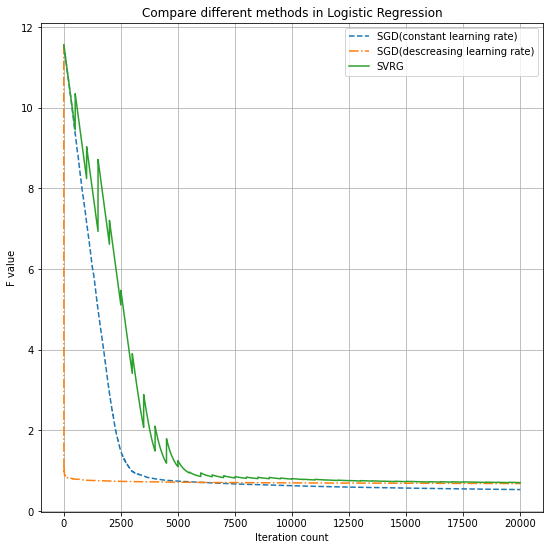

In [35]:
##画出函数值的图，看看是否下降
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(9,9)
buchang=np.arange(0,max(len(SGD_F_list),len(SGDd_F_list),len(SVRG_F_list)))
plt.title("Compare different methods in Logistic Regression")
plt.ylabel("F value")
plt.xlabel("Iteration count")
plt.grid()
plt.plot(buchang,SGD_F_list,"--",label="SGD(constant learning rate)");
plt.plot(buchang,SGDd_F_list,"-.",label="SGD(descreasing learning rate)");
plt.plot(buchang,SVRG_F_list,"-",label="SVRG");
plt.legend();
plt.show()